# Pengenalan Pola

## Tugas 4: Clustering

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas4_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Untuk kelancaran Anda, gunakan Python 3 dalam tugas ini. Selain itu, terdapat beberapa _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scikit-learn
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/65**

### Deskripsi Dataset

Dataset yang Anda akan gunakan adalah artikel berita dari BBC yang telah dibuat dalam bentuk yang mudah diakses. Dataset ini terdiri dari 2225 dokumen dari situs berita BBC pada tahun 2004-2005 yang berasal dari lima topik: (business, entertainment, politics, sport, tech).

Untuk dataset aslinya dapat Anda akses di [sini](http://mlg.ucd.ie/datasets/bbc.html). Dataset ini dipublikasikan bersama dengan makalah berikut:

> D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

### Mengimpor Modul dan Dataset

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [110]:
plt.rcParams['figure.figsize'] = (12.0, 7.0)

In [111]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [113]:
df = pd.read_csv('../input/bbc.csv')

In [114]:
X = df['text']
y = df['y'].astype('category')

## 1. Eksplorasi Awal Data (15 poin)

### Soal 1.1.a (4 poin)

Tunjukkan 25 kata-kata yang paling sering muncul dalam semua dokumen.

*Petunjuk: Gunakan modul* `CountVectorizer`.

In [115]:
vec = CountVectorizer().fit(X)
bag_of_words = vec.transform(X)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
df.head(25)

,Word,Frequency
0,the,52636
1,to,25113
2,of,20008
3,and,18611
4,in,17725
5,for,8945
6,is,8555
7,that,8257
8,it,7893
9,on,7625


### Soal 1.1.b (2 poin)

Anda mungkin akan menemukan bahwa ada banyak kata-kata yang berupa kata hubung dari 25 kata-kata yang paling sering muncul tersebut. Kata-kata ini sering dikenal dengan nama *stopwords*. Hapus kata-kata ini dengan mengatur parameter `stop_words='english'` pada modul `CountVectorizer`. Apakah kata-katanya berubah?

In [116]:
vec = CountVectorizer(stop_words='english').fit(X)
bag_of_words = vec.transform(X)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
df.head(25)

,Word,Frequency
0,said,7255
1,mr,3005
2,year,2309
3,people,2045
4,new,1978
5,time,1322
6,world,1201
7,government,1160
8,uk,1115
9,years,1003


### Soal 1.2 (4 poin)

Dengan menggunakan cara yang sama, munculkan 25 kata-kata yang sering muncul dari dokumen dalam tiap topik/kategori.

In [117]:
for category in y.unique():
    vec = CountVectorizer(stop_words='english').fit(X)
    bag_of_words = vec.transform(X)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(category)
    df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    print(df.head(25))
    print()

entertainment
          Word  Frequency
0         said       7255
1           mr       3005
2         year       2309
3       people       2045
4          new       1978
5         time       1322
6        world       1201
7   government       1160
8           uk       1115
9        years       1003
10        best        974
11        just        957
12        make        945
13        told        911
14        film        890
15        like        879
16        game        871
17       music        839
18         000        804
19      labour        804
20         bbc        767
21         set        762
22      number        760
23         way        740
24       added        733

tech
          Word  Frequency
0         said       7255
1           mr       3005
2         year       2309
3       people       2045
4          new       1978
5         time       1322
6        world       1201
7   government       1160
8           uk       1115
9        years       1003
10        best    

### Soal 1.3 (5 poin)

Lakukan eksplorasi tambahan terhadap data yang diberikan. Apa kesimpulan Anda dari eksplorasi awal sejauh ini?

In [118]:
vec = CountVectorizer(lowercase=False).fit(X)
bag_of_words = vec.transform(X)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
df.head(25)

,Word,Frequency
0,the,44610
1,to,24997
2,of,19904
3,and,18037
4,in,16694
5,for,8728
6,is,8546
7,The,8022
8,that,7934
9,on,7369


*Dari hasil eksplorasi, dapat diketahui bahwa dengan mengubah lowercase menjadi False, akan mengubah frekuensi perkata-nya, karena apabila lowercase=False, kata-nya tidak dikonversi menjadi lowercase (The menjadi the), sehingga The dan the dihitung sebagai kata yang berbeda*

## 2. Clustering dengan k-Means (20 poin)

### Soal 2.1 (4 poin)

Lakukan vektorisasi terhadap dokumen yang diberikan, tapi kali ini gunakan modul [`TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Penjelasan tentang metode **TF-IDF** bisa Anda lihat di [sini](http://tfidf.com/). Namun, untuk saat ini Anda tidak perlu tahu terlalu mendalam tentang metode ini. Yang perlu Anda ketahui adalah sebuah dokumen dapat direpresentasikan ke dalam bentuk vektor layaknya bag-of-words, tetapi kata yang sering muncul di berbagai dokumen, seperti halnya *stopwords* di soal 1, akan dibobotkan lebih kecil.

Vektor yang dihasilkan dengan TF-IDF akan memiliki dimensi yang cukup besar. Untuk kemudahan visualisasi, gunakan modul `TruncatedSVD` untuk menghasilkan **dua komponen prinsipil**. Modul ini bekerja seperti halnya *Principal Component Analysis* (PCA) yang telah dibahas di pertemuan kelima.

Gambarkan *scatter plot* dari dua dimensi yang dihasilkan. Hapus *stopwords* dari dokumen saat melakukan vektorisasi. Lalu, **warnai tiap titik** (dokumen) **berdasarkan topik** dari dokumen tersebut.

In [119]:
tfid = TfidfVectorizer().fit(X,y)
tfid = tfid.fit_transform(X,y)

svd = TruncatedSVD(n_components=2).fit(tfid)
svd = svd.transform(tfid)

Text(0, 0.5, 'Component 2')

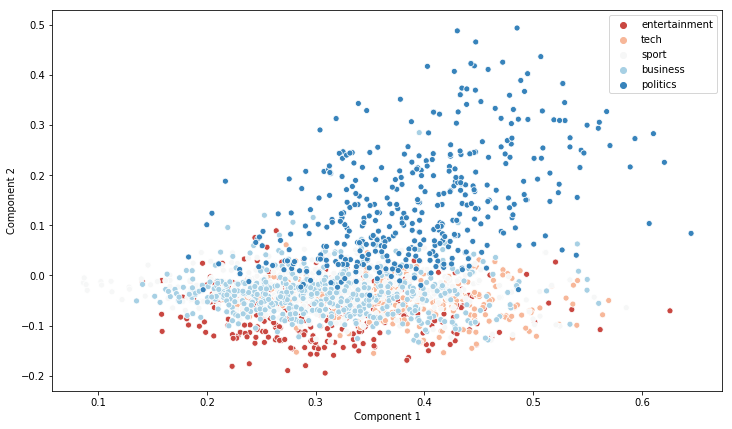

In [120]:
sns.scatterplot(x=svd[:,0], y=svd[:,1], hue=y.tolist(), palette='RdBu')
plt.xlabel("Component 1")
plt.ylabel("Component 2")

### Soal 2.2 (3 poin)

Cara untuk melakukan visualisasi dari dokumen dengan lebih baik adalah dengan menggunakan metode reduksi dimensi yang lebih canggih, misalnya dengan [t-SNE](https://lvdmaaten.github.io/tsne/). Lakukan seperti yang Anda lakukan pada soal 2.1, tetapi atur agar modul `TruncatedSVD` mereduksi vektornya hanya menjadi 100 dimensi. Dari vektor 100-dimensi tersebut, reduksi kembali dimensinya dengan menggunakan modul `TSNE` dari scikit-learn. Atur parameter `random_state=42` pada TSNE agar hasilnya dapat direproduksi.

*Petunjuk: Agar tidak terlalu banyak menggunakan `.fit_transform()`, Anda mungkin bisa menggunakan fungsi [`make_pipeline()`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html).*

In [121]:
from sklearn.manifold import TSNE

In [122]:
tsne = TSNE(random_state=42)
mp = make_pipeline(TruncatedSVD(n_components=100), tsne)
mp = mp.fit_transform(tfid)

### Soal 2.3 (4 poin)

Dengan metode yang telah kita lakukan di soal 2.2, seharusnya setiap "pulau" yang Anda lihat dapat dibentuk sebagai *clusters*. Sebagai awalan, terapkan k-Means pada vektor yang telah Anda hasilkan di atas. Untuk menentukan jumlah *cluster* terbaik, coba nilai $k \in [2,10]$, lalu gambarkan *scree plot*-nya. Berapa nilai $k$ yang terbaik?

*Petunjuk: Perhatikan atribut `.inertia_` yang dihasilkan dari modul `KMeans`. Gunakan parameter `random_state=13` pada `KMeans`.*

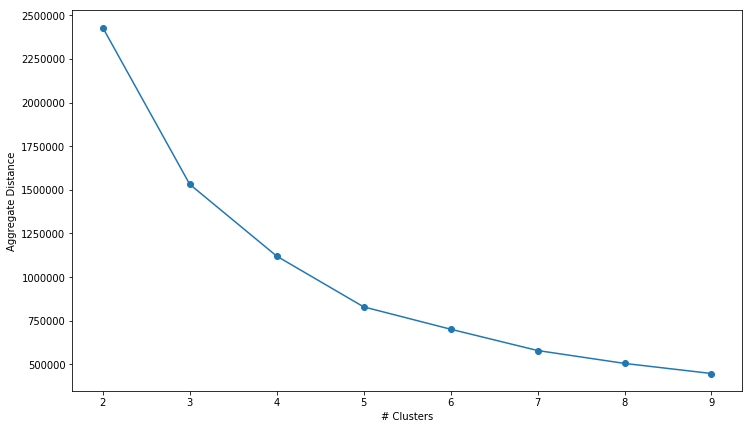

In [123]:
v= []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mp)
    v.append(kmeans.inertia_)

plt.plot(range(2,10), v, 'o-')
plt.xticks(range(2,10))
plt.xlabel('# Clusters')
plt.ylabel('Aggregate Distance')
plt.show()

### Soal 2.4 (4 poin)

Karena kita sebetulnya sudah tahu bahwa dataset yang kita punya terdiri dari lima topik, untuk saat ini Anda dapat menggunakan $k = 5$. Jadi, lakukan clustering dengan k-Means dari vektor 2-dimensi yang dihasilkan dengan t-SNE tadi dengan $k = 5$. Visualisasikan hasilnya dan sertakan *centroids* dalam visualisasi yang Anda hasilkan.

*Petunjuk: Anda dapat merujuk ke [sini](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) untuk pembuatan visualisasinya.*

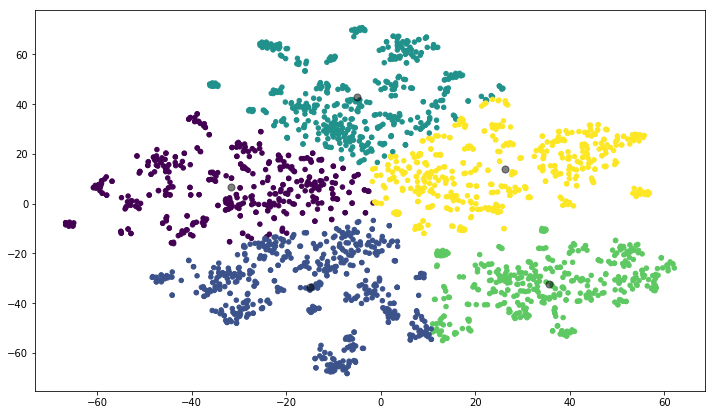

In [124]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(mp)
y_kmeans = kmeans.predict(mp)

plt.scatter(mp[:, 0], mp[:, 1], c=y_kmeans, s=20)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);



### Soal 2.5 (5 poin)

Berikan kesimpulan Anda dari eksplorasi *clustering* dengan k-Means sejauh ini.

*Jawaban Anda di sini*

## 3. Clustering dengan Gaussian Mixture Models (30 poin)

### Soal 3.1 (5 poin)

Apa yang terjadi jika menggunakan GMM untuk melakukan *clustering*? Sebelumnya, Anda harus mencari nilai jumlah *cluster* yang terbaik. Coba gambarkan plot nilai AIC dan BIC untuk $k \in [2,10]$ dari algoritma GMM. Gunakan parameter `random_state=13`.

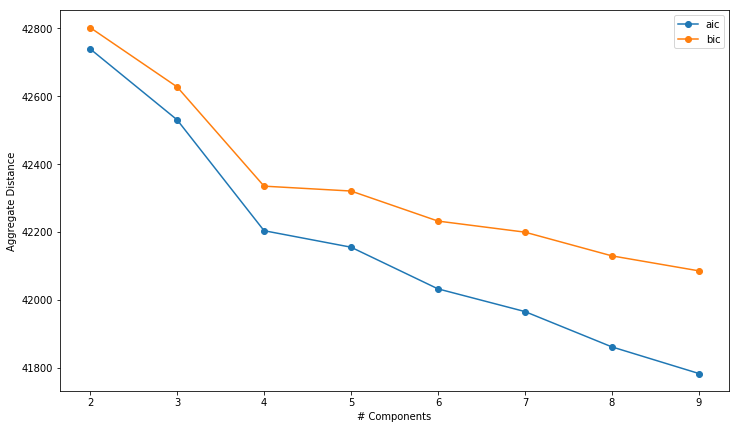

In [125]:
v = []
w = []
for i in range(2,10):
    gmm = GMM(n_components=i, random_state=13)
    gmm.fit(mp)
    v.append(gmm.aic(mp))
    w.append(gmm.bic(mp))

plt.plot(range(2,10), v, 'o-',label='aic')
plt.plot(range(2,10), w, 'o-', label='bic')
plt.xticks(range(2,10))
plt.xlabel('# Components')
plt.ylabel('Aggregate Distance')
plt.legend()
plt.show()

### Soal 3.2 (3 poin)

Seperti pada soal 2, lakukan *clustering* dengan menggunakan modul `GaussianMixture` dari vektor 2-dimensi yang dihasilkan. Visualisasikan hasil *clustering* yang didapatkan. Jangan lupa untuk menyertakan *centroids*-nya.

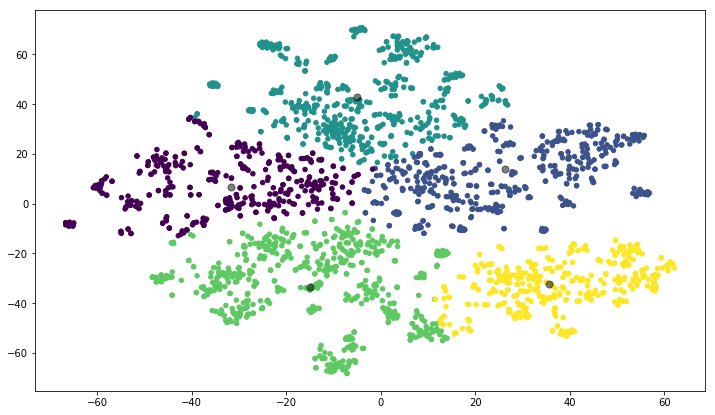

In [126]:
gmm = GMM(n_components=5)
gmm.fit(mp)
y_gmm = gmm.predict(mp)

plt.scatter(mp[:, 0], mp[:, 1], c=y_gmm, s=20)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

### Soal 3.3.a (2 poin)

Perhatikan daerah $-15 \leq x_1 \leq -10$ dan $-10 \leq x_2 \leq 0$. Daerah ini adalah saat banyak *cluster* mulai beririsan. Jadi, gunakan daerah ini sebagai [*mask*](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html). Tampilkan topik/kategori dari artikel berita yang ada pada daerah tersebut. Tampilkan juga prediksi *cluster* dari GMM.

*Perhatian: Ingat bahwa label cluster dari GMM tidak sama dengan kode dari topik/kategori artikel.*

In [157]:
x1 = mp[:,0][mp[:,0]<=-10.15]
x1 = x1[x1 >= -15]
x2 = mp[:,1][mp[:,1]<=0]
x2 = x2[x2 >=-10]

In [128]:
x = np.asarray ([x1,x2])

In [129]:
x = x.reshape(-1,2)

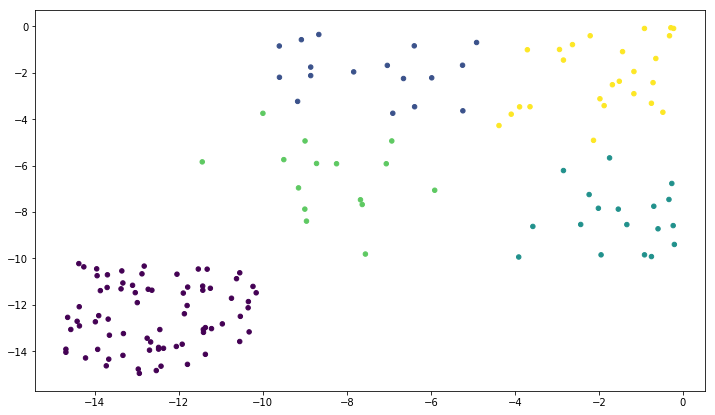

In [130]:
gmm = GMM(n_components=5)
gmm.fit(x,y)
y_gmm = gmm.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_gmm, s=20)

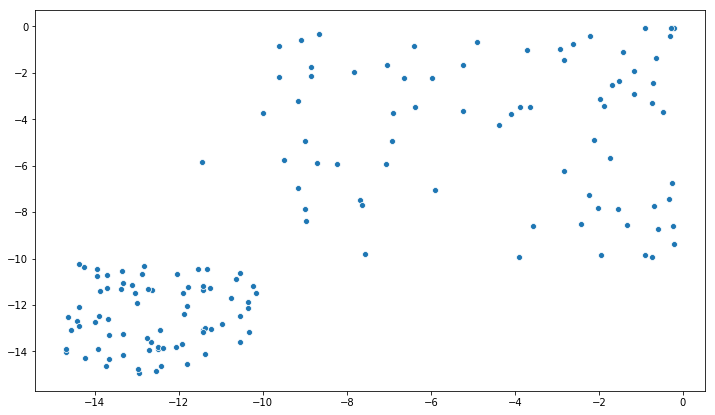

In [131]:
sns.scatterplot(x=x[:,0], y=x[:,1], palette='RdBu')

### Soal 3.3.b (2 poin)

Dengan menggunakan Gaussian Mixture Models, Anda dapat menghasilkan nilai probabilitas dari "prediksi" Anda. Gunakan metode `.predict_proba()` pada data dalam daerah yang ditentukan di soal 3.3.a. Tampilkan dalam bentuk tabel untuk memudahkan Anda mengevaluasi hasilnya. Anda juga dapat menggunakan [*style formatting*](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.formats.style.Styler.format.html) dari pandas untuk memunculkan probabilitasnya dalam bentuk persentase.

In [135]:
gmmpred = gmm.predict_proba(x)

In [152]:
df = pd.DataFrame(gmmpred, columns=['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])
df = df.style.format("{:.3%}")
df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,99.999%,0.000%,0.000%,0.001%,0.000%
1,100.000%,0.000%,0.000%,0.000%,0.000%
2,100.000%,0.000%,0.000%,0.000%,0.000%
3,100.000%,0.000%,0.000%,0.000%,0.000%
4,100.000%,0.000%,0.000%,0.000%,0.000%
5,100.000%,0.000%,0.000%,0.000%,0.000%
6,100.000%,0.000%,0.000%,0.000%,0.000%
7,100.000%,0.000%,0.000%,0.000%,0.000%
8,100.000%,0.000%,0.000%,0.000%,0.000%
9,100.000%,0.000%,0.000%,0.000%,0.000%


### Soal 3.3.c (2 poin)

Munculkan isi masing-masing satu dokumen dari **topik yang diprediksi** oleh Gaussian Mixture Model yang Anda hasilkan. Apakah hasilnya benar-benar berbeda?

### Soal 3.4.a (2 poin)

Ambil daerah yang ekstrem, misalnya $x_2 < -60$. Munculkan kembali prediksi *cluster*-nya dengan memunculkan probabilitasnya seperti pada soal 3.3.b. Apa yang dapat Anda perhatikan di sini?

In [193]:
x1 = mp[:,0][mp[:,0]<=-53.7]
x2 = mp[:,1][mp[:,1]<-60]

In [194]:
x1.shape

(37,)

In [195]:
xx = np.asarray ([x1,x2])

In [196]:
xx = xx.reshape(-1,2)

In [197]:
gmmpred = gmm.predict_proba(xx)

In [198]:
df = pd.DataFrame(gmmpred, columns=['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])
df = df.style.format("{:.3%}")
df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,100.000%,0.000%,0.000%,0.000%,0.000%
1,100.000%,0.000%,0.000%,0.000%,0.000%
2,100.000%,0.000%,0.000%,0.000%,0.000%
3,100.000%,0.000%,0.000%,0.000%,0.000%
4,100.000%,0.000%,0.000%,0.000%,0.000%
5,100.000%,0.000%,0.000%,0.000%,0.000%
6,100.000%,0.000%,0.000%,0.000%,0.000%
7,100.000%,0.000%,0.000%,0.000%,0.000%
8,100.000%,0.000%,0.000%,0.000%,0.000%
9,100.000%,0.000%,0.000%,0.000%,0.000%


### Soal 3.4.b (2 poin)

Cetak isi salah satu dokumen dari soal 3.4.a.

### Soal 3.5 (6 poin)

Lakukan eksplorasi tambahan dari apa yang sudah Anda dapatkan sejauh ini. Beberapa hal yang bisa Anda coba:

- Mencoba clustering tanpa menghilangkan *stopwords*
- Mengganti random seed dan melihat perbedaan hasil clustering
- Mencoba nilai $k$ yang berbeda
- Mencoba mengeluarkan "akurasi" dari prediksi dengan GMM maupun k-Means
- Mengeksplorasi pustaka [Altair](https://altair-viz.github.io/) untuk visualisasi yang lebih interaktif

### Soal 3.6 (6 poin)

Berikan kesimpulan Anda dari hasil eksplorasi Anda dalam tugas ini. Ada baiknya Anda kaitkan juga dengan eksplorasi tambahan yang Anda lakukan untuk soal 3.5.

*Jawaban Anda di sini*